# Sampling och Variation

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
np.random.seed(0)
true_mean, true_sd = 7000, 1800

pop = np.random.normal(true_mean, true_sd, size=1_000_000)

pd.Series(pop).describe()

count    1000000.000000
mean        7002.721864
std         1799.859287
min        -2004.137572
25%         5787.607348
50%         7004.297915
75%         8216.303397
max        15489.991876
dtype: float64

In [4]:
def sample_mean(n):
    return np.mean(np.random.choice(pop, size=n, replace=False))

R = 2000
means_n30 = np.array([sample_mean(30) for _ in range(R)])
means_n200 = np.array([sample_mean(200) for _ in range(R)])

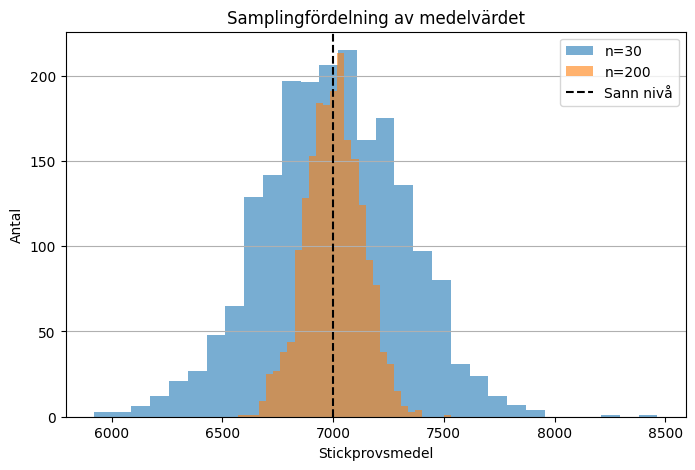

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(means_n30, bins=30, alpha=0.6, label="n=30")
ax.hist(means_n200, bins=30, alpha=0.6, label="n=200")
ax.axvline(true_mean, color="k", linestyle="--", label="Sann nivå")
ax.set_title("Samplingfördelning av medelvärdet")
ax.set_xlabel("Stickprovsmedel")
ax.set_ylabel("Antal")
ax.grid(True, axis="y")
ax.legend()
plt.show()

In [7]:
sd = np.std(pop, ddof=1)
SE_n30 = sd / np.sqrt(30)
SE_n200 = sd / np.sqrt(200)
print(SE_n30)
print(SE_n200)

328.60784389784334
127.26927068494739


In [8]:
def ci_95(x):
    m = x.mean()
    s = x.std(ddof=1)
    se = s / np.sqrt(len(x))
    z = 1.96
    return m - z*se, m + z*se

def coverage(n, R=1000):
    ok = 0
    for _ in range(R):
        x = np.random.choice(pop, size=n, replace=False)
        lo, hi = ci_95(pd.Series(x))
        ok += (lo <= true_mean <= hi)
    return ok / R

coverage(30), coverage(200)

(np.float64(0.94), np.float64(0.956))

In [10]:
x = np.random.choice(pop, size=60, replace=False)

m = x.mean()
s = x.std(ddof=1)
se = s / np.sqrt(len(x))
z = 1.96
ci = (m - z*se, m + z*se)

print("Stickprovssnitt", round(m, 1),"\n", "CI95:", tuple(round(c, 1) for c in ci),"\n", "Sann nivå:", true_mean)

Stickprovssnitt 7381.5 
 CI95: (np.float64(6935.1), np.float64(7827.8)) 
 Sann nivå: 7000


In [11]:
A = np.random.choice(pop, size=60, replace=False)
B = np.random.choice(pop, size=60, replace=False)

obs = B.mean() - A.mean()

all_vals = np.concatenate([A, B])
nA = len(A)
R = 5000
perm = np.empty(R)
for i in range(R):
    np.random.shuffle(all_vals)
    perm[i] = all_vals[nA:].mean() - all_vals[:nA].mean()
p = np.mean(np.abs(perm) >= abs(obs))
p

np.float64(0.7904)